Самая простейшая нейросетка на основе ТОЛЬКО данных о разговоре.

Данные только по вертикали "Сантехника"

In [29]:
import pandas as pd
df = pd.read_csv( '1.csv', sep=',', encoding='utf-8' )
df

,name,phone,group_id,question_id,confirm,result,result_comment
0,Куринов Максим,89093869470,3,1,1,0,Согласен/ 3 раза звонила не взял трубку
1,Баж Егор,89047510599,3,1,1,0,Согласен/ тел не доступен
2,Сериков Андрей,89081499151,1,1,1,0,Согласен/ не выход
3,Егоров Андрей,89009250730,1,1,1,1,Согласен/ выход
4,Птицын Валентин,89685221822,1,1,1,1,Согласен/ выход
...,...,...,...,...,...,...,...
95,Бойка Игорь Анатольевич,89009027134,1,6,1,0,Согласен/ 3 раза звонила не взял трубку
96,Есипов Николай Владиславович,89250528281,1,6,1,1,Согласен/выход
97,Аксенов Александр,89521283717,1,6,1,1,Согласен/выход
98,Владислав Владислав,89225718763,1,6,1,1,Согласен/выход


In [30]:
df = df.drop(columns=['name', 'phone', 'result_comment'])
df

,group_id,question_id,confirm,result
0,3,1,1,0
1,3,1,1,0
2,1,1,1,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
95,1,6,1,0
96,1,6,1,1
97,1,6,1,1
98,1,6,1,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   group_id     100 non-null    int64
 1   question_id  100 non-null    int64
 2   confirm      100 non-null    int64
 3   result       100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [32]:
df['result'] = df['result'].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   group_id     100 non-null    int64
 1   question_id  100 non-null    int64
 2   confirm      100 non-null    int64
 3   result       100 non-null    bool 
dtypes: bool(1), int64(3)
memory usage: 2.6 KB


# Логистическая регрессия

In [33]:
from sklearn.linear_model import LogisticRegression
param_to_predict='result'
y = df[param_to_predict]
X = df.loc[:, df.columns != param_to_predict]
model_lr = LogisticRegression(random_state=0, solver='liblinear').fit(X, y)
print(round(model_lr.score(X,y), 4)) # mean accuracy

0.67


In [34]:
# feature_names = LR[:-1].get_feature_names_out()

In [35]:
result = model_lr.predict( pd.DataFrame( data = { 'group_id': 3, 'question_id': 5, 'confirm': 1 }, index = [0] ) )
result[0]

False

( про то, зачем нужен `index = [0]` читать [тут](https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi) )

In [36]:
result = model_lr.predict( pd.DataFrame( data = { 'group_id': 1, 'question_id': 6, 'confirm': 0 }, index = [0] ) )
result[0]

True

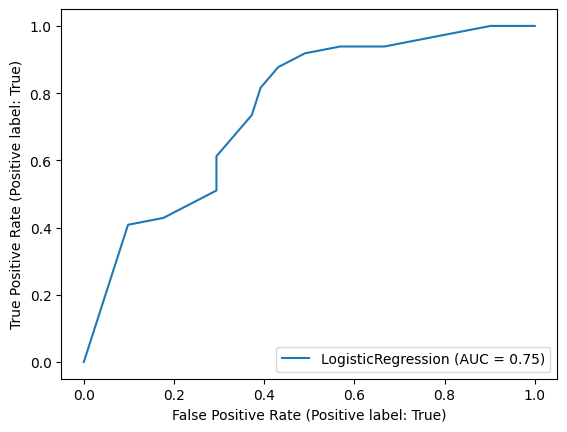

In [37]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(model_lr, X, y)
plt.show()

# Метод опорных векторов (SVM)

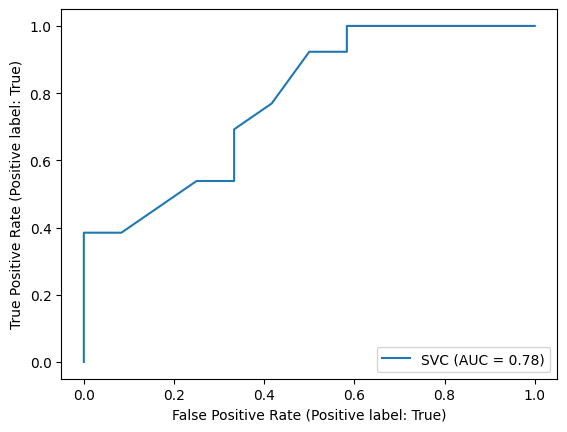

In [38]:
# C-Support Vector Classification (supervised learning)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
param_to_predict='result'
y = df[param_to_predict]
X = df.loc[:, df.columns != param_to_predict]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model_sv = SVC(random_state=0).fit(X_train, y_train)
RocCurveDisplay.from_estimator(model_sv, X_test, y_test)
plt.show()

In [39]:
result = model_sv.predict( pd.DataFrame( data = { 'group_id': 3, 'question_id': 5, 'confirm': 1 }, index = [0] ) )
result[0]

False

In [40]:
result = model_sv.predict( pd.DataFrame( data = { 'group_id': 1, 'question_id': 6, 'confirm': 0 }, index = [0] ) )
result[0]

True

# Градиентный бустинг (LightGBM)

In [41]:
from sklearn.ensemble import HistGradientBoostingClassifier
    param_to_predict='result'
    y = df[param_to_predict]
    X = df.loc[:, df.columns != param_to_predict]
    model_gb = HistGradientBoostingClassifier().fit(X, y)
print(clf.score(X, y)) # mean accuracy

0.69


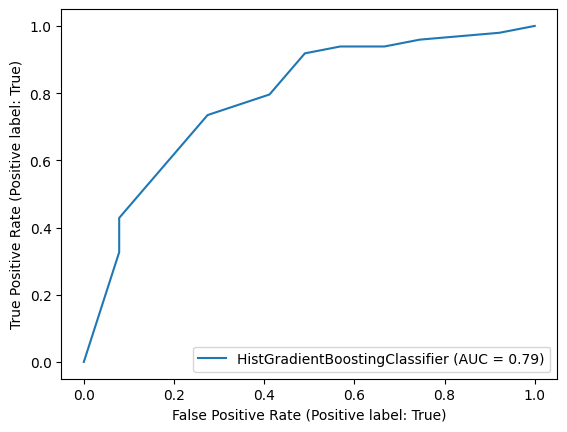

In [42]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
RocCurveDisplay.from_estimator(model_gb, X, y)
plt.show()

In [43]:
result = clf.predict( pd.DataFrame( data = { 'group_id': 3, 'question_id': 5, 'confirm': 1 }, index = [0] ) )
result[0]

False

In [44]:
result = clf.predict( pd.DataFrame( data = { 'group_id': 1, 'question_id': 6, 'confirm': 0 }, index = [0] ) )
result[0]

True

# Сравнение

[Точность (mean_accuracy)](https://developers.google.com/machine-learning/crash-course/classification/accuracy)

In [80]:
for model in [model_lr, model_sv, model_gb]:
    print(model.__class__.__name__, ' - ', 100.0*model.score(X,y))

LogisticRegression  -  67.0
SVC  -  66.0
HistGradientBoostingClassifier  -  69.0


[ROC AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

In [81]:
from sklearn.metrics import roc_auc_score
for model in [model_lr, model_gb]: # no model_sv
    print(model.__class__.__name__, round(roc_auc_score(y, model.predict_proba(X)[:, 1]),4) )

LogisticRegression 0.7531
HistGradientBoostingClassifier 0.7871
